## SVM

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Lets Try SVM. Although SVM also works good for linearly separable data but if data is not linearly separable then we may use SVM kernels like RGB, Polynomial and sigmoid. But there wull be a similar problem with SVM as we had with logistic regression of data being very biased but lets try SVM. 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_pickle("/content/drive/MyDrive/Hamed Presentation /feature_engineering_data.pkl")

In [4]:
df

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,24011ae4ebbe3035111d65fa7c15bc57,4.268365,4.739944,0.000000,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,...,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,0,0,0,1,0,0,0,44.555962,0.088421,0.000000
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,0,0,0,1,0,0,0,44.551475,0.000000,0.000000
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,0,0,0,1,0,0,0,40.812330,24.516531,16.348129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14601,18463073fb097fc0ac5d3e040f356987,4.508812,4.680707,0.000000,3.667360,0.0,1.291591,0.138305,0.000000,44.311378,...,0,0,0,0,0,1,0,44.514760,0.000000,0.000000
14602,d0a6f71671571ed83b2645d23af6de00,3.858778,0.000000,2.260071,2.801191,0.0,2.161458,0.100167,0.091892,43.148907,...,0,0,0,0,0,1,0,59.122473,36.488785,8.416235
14603,10e6828ddd62cbcf687cb74928c4c2d2,3.265996,0.000000,2.255273,2.281919,0.0,2.115943,0.116900,0.100015,40.606701,...,0,0,0,0,0,1,0,40.826071,24.524832,16.353854
14604,1cf20fd6206d7678d5bcafd28c53b4db,2.120574,0.000000,0.000000,3.058385,0.0,0.912753,0.145711,0.000000,44.311378,...,0,0,0,0,0,1,0,44.460984,0.007124,0.000000


In [5]:
df.shape

(14606, 36)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14606 entries, 0 to 14605
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   cons_12m                        14606 non-null  float64
 2   cons_gas_12m                    14606 non-null  float64
 3   cons_last_month                 14606 non-null  float64
 4   forecast_cons_12m               14606 non-null  float64
 5   forecast_discount_energy        14606 non-null  float64
 6   forecast_meter_rent_12m         14606 non-null  float64
 7   forecast_price_energy_off_peak  14606 non-null  float64
 8   forecast_price_energy_peak      14606 non-null  float64
 9   forecast_price_pow_off_peak     14606 non-null  float64
 10  has_gas                         14606 non-null  int64  
 11  imp_cons                        14606 non-null  float64
 12  margin_gross_pow_ele            

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.model_selection import train_test_split
X = df.drop(["id","churn"], axis = 1)
Y = df["churn"]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.20)

In [9]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,...,channel_sdd,channel_usi,origin_ewx,origin_kam,origin_ldk,origin_lxi,origin_usa,mean_year_price_p1,mean_year_price_p2,mean_year_price_p3
0,4.268365,4.739944,0.000000,3.041639,0.0,0.444045,0.114481,0.098142,40.606701,1,...,0,0,0,0,0,1,0,41.067053,22.452760,14.967871
1,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,0,...,0,0,0,1,0,0,0,44.460984,0.007124,0.000000
2,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,0,...,0,0,0,1,0,0,0,44.555962,0.088421,0.000000
3,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,0,...,0,0,0,1,0,0,0,44.551475,0.000000,0.000000
4,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,0,...,0,0,0,1,0,0,0,40.812330,24.516531,16.348129


In [11]:
from sklearn import svm
model = svm.SVC(kernel='linear',C=10)

In [ ]:
model.fit(X_train, y_train)

Our model is failing to converge with both CPU, TPU and GPU machines allocation on google colaboratory. It may be a case that model is not linearly separable. Lets try some SVM kernels avaialable with us to see whether the model converges better. We will first try polynomial kernel. 

In [12]:
model_poly_svm = svm.SVC(kernel = "poly", C = 10)

In [13]:
model_poly_svm.fit(X_train, y_train)

SVC(C=10, kernel='poly')

This means that data was not linearly separable and hence this also prooves why our logistic regression fails to deliver precision and gives very biased results. Now even in this case we may have a problem of SVM getting biased but lets see further. 

In [14]:
y_pred = model_poly_svm.predict(X_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9117043121149897


Although accuracy score is not a right matrix to judge the model because our output data is highly biased. 

In [15]:
negative = 0
positive = 0
for pred in y_pred:
  if pred == 0:
    negative = negative +1 
  else:
    positive = positive +1 

print("Non churn cases: {}".format(negative))
print("Churn cases: {}".format(positive))

Non churn cases: 2894
Churn cases: 28


In [16]:
y_test.value_counts()

0    2672
1     250
Name: churn, dtype: int64

In [17]:
y_pred_train = model_poly_svm.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Training-set accuracy score: 0.9100
Model accuracy score: 0.9117


We have similar accuracy for training and test data which also indicates the underfitting of the model and leads to an assumption of bias in the model. 

In [18]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2654   18]
 [ 240   10]]

True Positives(TP) =  10

True Negatives(TN) =  2654

False Positives(FP) =  240

False Negatives(FN) =  18


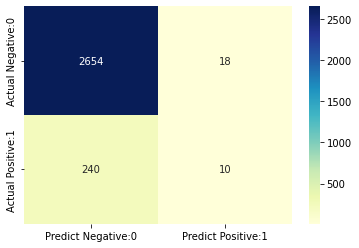

In [19]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9117


In [21]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0400


precision is very very low, which is of utmost importance to us in this case study 

In [22]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.3571


In [23]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.3571


In [24]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0829


## HyperParameter Tuning SVM

Read more about gamma : https://stats.stackexchange.com/questions/168014/where-can-i-read-about-gamma-coefficient-in-svm-in-scikit-learn#:~:text=The%20RBF%20kernel%20function%20is,u%E2%88%92v%E2%80%962).

In [51]:
param_grid = {'C': [1, 10], 
              'gamma': [1, 0.75], 
              'kernel': ['poly']} 

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [52]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model_poly_svm,param_grid=param_grid, n_jobs=1)

In [ ]:
grid.fit(X_train,y_train)

it fails to converge. But this is one of the things that could be done with SVM. 

## KNN

lazy learning algorith which actually doesn't train any model but will perform the operations when the classification needs to be done. 

In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization
%matplotlib inline

In [35]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier


# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)


# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
y_pred = knn.predict(X_test)

y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [37]:
# probability of getting output as 1 i.e non churn 

knn.predict_proba(X_test)[:,0]

array([1., 1., 1., ..., 1., 1., 1.])

In [38]:
# probability of getting output as 0 i.e churn

knn.predict_proba(X_test)[:,1]

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8984


In [40]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[1,1])

print('\nTrue Negatives(TN) = ', cm[0,0])

print('\nFalse Positives(FP) = ', cm[1,0])

print('\nFalse Negatives(FN) = ', cm[0,1])

Confusion matrix

 [[2601   71]
 [ 226   24]]

True Positives(TP) =  24

True Negatives(TN) =  2601

False Positives(FP) =  226

False Negatives(FN) =  71


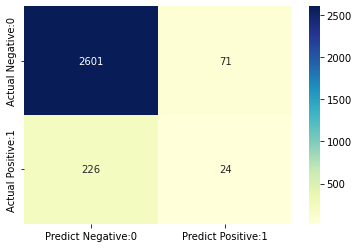

In [41]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0', 'Predict Positive:1'], 
                                 index=['Actual Negative:0', 'Actual Positive:1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [42]:
# print classification accuracy
TP = cm[1,1]
TN = cm[0,0]
FP = cm[1,0]
FN = cm[0,1]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8984


In [43]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.0960


Low precision. Lets do some hyperparameter tuning 

In [44]:
y_pred_1 = knn.predict_proba(X_test)[:, 1]

In [45]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5901


In [46]:
param_grid = {'n_neighbors': [3,5,7,9,11]} 

In [49]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(knn,param_grid=param_grid, n_jobs=1)

In [50]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11]})